# Machine Learning Project on Adult Income Prediction

### Data Loading

In [2]:
pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.1 MB 2.0 MB/s 
     |████████████████████████████████| 84 kB 2.9 MB/s 
     |████████████████████████████████| 84 kB 3.5 MB/s 
     |████████████████████████████████| 2.3 MB 31.3 MB/s 
     |████████████████████████████████| 55 kB 3.3 MB/s 
     |████████████████████████████████| 57 kB 5.2 MB/s 
     |████████████████████████████████| 270 kB 53.2 MB/s 
     |████████████████████████████████| 112 kB 60.1 MB/s 
     |████████████████████████████████| 212 kB 46.5 MB/s 
     |████████████████████████████████| 54 kB 3.2 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 80 kB 9.1 MB/s 
     |████████████████████████████████| 68 kB 6.5 MB/s 
     |████████████████████████████████| 43 kB 2.2 MB/s 
     |████████████████████████████████| 856 kB 60.6 MB/s 
     |████████████████████████████████| 594 kB 54.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
import gradio as gr

In [2]:
data=pd.read_csv('adult_data.csv')
data.head()

39          State-gov   77516   Bachelors   13        Never-married  \
0  50   Self-emp-not-inc   83311   Bachelors   13   Married-civ-spouse   
1  38            Private  215646     HS-grad    9             Divorced   
2  53            Private  234721        11th    7   Married-civ-spouse   
3  28            Private  338409   Bachelors   13   Married-civ-spouse   
4  37            Private  284582     Masters   14   Married-civ-spouse   

         Adm-clerical   Not-in-family   White     Male   2174   0   40  \
0     Exec-managerial         Husband   White     Male      0   0   13   
1   Handlers-cleaners   Not-in-family   White     Male      0   0   40   
2   Handlers-cleaners         Husband   Black     Male      0   0   40   
3      Prof-specialty            Wife   Black   Female      0   0   40   
4     Exec-managerial            Wife   White   Female      0   0   40   

    United-States   <=50K  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3            Cuba   <=50K  
4   United-States   <=50K

In [3]:
column_names = ['age','workclass' ,'fnlwgt' ,'education' ,'educational_num' , 'marital_status' ,'occupation' ,'relationship' , 'race' ,'gender' ,'capital_gain' , 'capital_loss' , 'hours_per_week' ,'native_country'  ,'income' ]
data.columns = column_names
data.head(10)

age          workclass  fnlwgt      education  educational_num  \
0   50   Self-emp-not-inc   83311      Bachelors               13   
1   38            Private  215646        HS-grad                9   
2   53            Private  234721           11th                7   
3   28            Private  338409      Bachelors               13   
4   37            Private  284582        Masters               14   
5   49            Private  160187            9th                5   
6   52   Self-emp-not-inc  209642        HS-grad                9   
7   31            Private   45781        Masters               14   
8   42            Private  159449      Bachelors               13   
9   37            Private  280464   Some-college               10   

           marital_status          occupation    relationship    race  \
0      Married-civ-spouse     Exec-managerial         Husband   White   
1                Divorced   Handlers-cleaners   Not-in-family   White   
2      Married-civ-spouse   Handlers-cleaners         Husband   Black   
3      Married-civ-spouse      Prof-specialty            Wife   Black   
4      Married-civ-spouse     Exec-managerial            Wife   White   
5   Married-spouse-absent       Other-service   Not-in-family   Black   
6      Married-civ-spouse     Exec-managerial         Husband   White   
7           Never-married      Prof-specialty   Not-in-family   White   
8      Married-civ-spouse     Exec-managerial         Husband   White   
9      Married-civ-spouse     Exec-managerial         Husband   Black   

    gender  capital_gain  capital_loss  hours_per_week  native_country  income  
0     Male             0             0              13   United-States   <=50K  
1     Male             0             0              40   United-States   <=50K  
2     Male             0             0              40   United-States   <=50K  
3   Female             0             0              40            Cuba   <=50K  
4   Female             0             0              40   United-States   <=50K  
5   Female             0             0              16         Jamaica   <=50K  
6     Male             0             0              45   United-States    >50K  
7   Female         14084             0              50   United-States    >50K  
8     Male          5178             0              40   United-States    >50K  
9     Male             0             0              80   United-States    >50K

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32560 non-null  int64 
 1   workclass        32560 non-null  object
 2   fnlwgt           32560 non-null  int64 
 3   education        32560 non-null  object
 4   educational_num  32560 non-null  int64 
 5   marital_status   32560 non-null  object
 6   occupation       32560 non-null  object
 7   relationship     32560 non-null  object
 8   race             32560 non-null  object
 9   gender           32560 non-null  object
 10  capital_gain     32560 non-null  int64 
 11  capital_loss     32560 non-null  int64 
 12  hours_per_week   32560 non-null  int64 
 13  native_country   32560 non-null  object
 14  income           32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data.shape

(32560, 15)

In [6]:
data.describe()

age        fnlwgt  educational_num  capital_gain  \
count  32560.000000  3.256000e+04     32560.000000  32560.000000   
mean      38.581634  1.897818e+05        10.080590   1077.615172   
std       13.640642  1.055498e+05         2.572709   7385.402999   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.178315e+05         9.000000      0.000000   
50%       37.000000  1.783630e+05        10.000000      0.000000   
75%       48.000000  2.370545e+05        12.000000      0.000000   
max       90.000000  1.484705e+06        16.000000  99999.000000   

       capital_loss  hours_per_week  
count  32560.000000    32560.000000  
mean      87.306511       40.437469  
std      402.966116       12.347618  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000

In [7]:
data.income.unique()

array([' <=50K', ' >50K'], dtype=object)

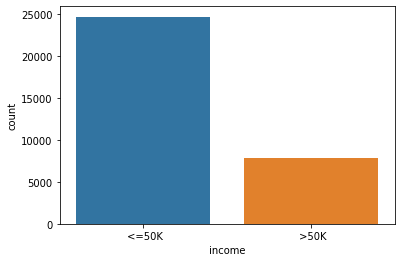

In [8]:
sns.countplot(data.income)

## Data Cleaning

In [9]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational_num    0
marital_status     0
occupation         0
relationship       0
race               0
gender             0
capital_gain       0
capital_loss       0
hours_per_week     0
native_country     0
income             0
dtype: int64

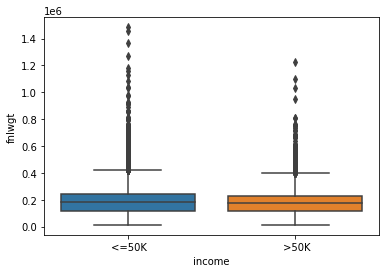

In [10]:
sns.boxplot(data.income,data['fnlwgt'])

In [11]:
data= data.drop(['fnlwgt'],axis=1)

In [12]:
data.head()

age          workclass   education  educational_num       marital_status  \
0   50   Self-emp-not-inc   Bachelors               13   Married-civ-spouse   
1   38            Private     HS-grad                9             Divorced   
2   53            Private        11th                7   Married-civ-spouse   
3   28            Private   Bachelors               13   Married-civ-spouse   
4   37            Private     Masters               14   Married-civ-spouse   

           occupation    relationship    race   gender  capital_gain  \
0     Exec-managerial         Husband   White     Male             0   
1   Handlers-cleaners   Not-in-family   White     Male             0   
2   Handlers-cleaners         Husband   Black     Male             0   
3      Prof-specialty            Wife   Black   Female             0   
4     Exec-managerial            Wife   White   Female             0   

   capital_loss  hours_per_week  native_country  income  
0             0              13   United-States   <=50K  
1             0              40   United-States   <=50K  
2             0              40   United-States   <=50K  
3             0              40            Cuba   <=50K  
4             0              40   United-States   <=50K

## Data Visualization and EDA

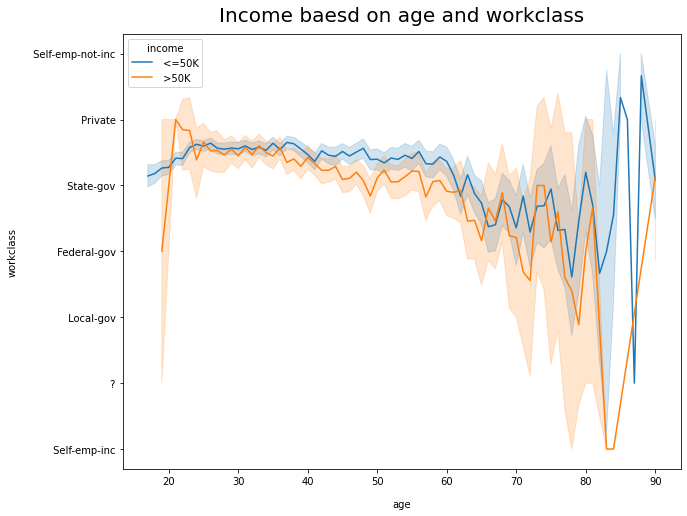

In [13]:
plt.figure(figsize=(10, 8))
sns.lineplot(x='age', y='workclass', hue='income', data=data)
plt.title("Income baesd on age and workclass", y=1.015, fontsize=20)
plt.xlabel("age", labelpad=13)
plt.ylabel("workclass", labelpad=13)
ax = plt.gca()

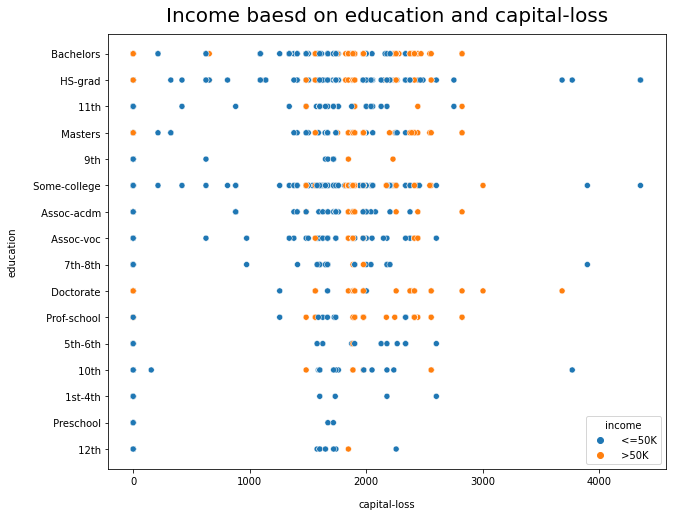

In [15]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='capital_loss', y='education', hue='income', data=data)
plt.title("Income baesd on education and capital-loss", y=1.015, fontsize=20)
plt.xlabel("capital-loss", labelpad=13)
plt.ylabel("education", labelpad=13)
ax = plt.gca()

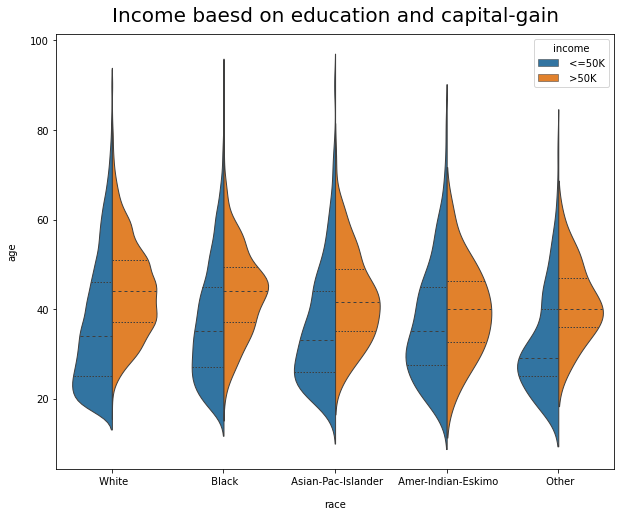

In [16]:
plt.figure(figsize=(10, 8))
sns.violinplot(data=data, x="race", y="age", hue="income",
               split=True, inner="quart", linewidth=1,
               )
plt.title("Income baesd on education and capital-gain", y=1.015, fontsize=20)
plt.xlabel("race", labelpad=13)
plt.ylabel("age", labelpad=13)
ax = plt.gca()

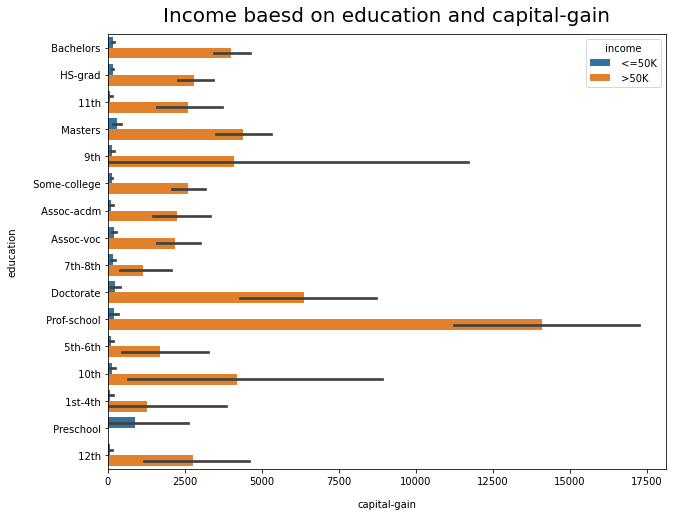

In [18]:
plt.figure(figsize=(10, 8))
sns.barplot(x='capital_gain', y='education', hue='income', data=data)
plt.title("Income baesd on education and capital-gain", y=1.015, fontsize=20)
plt.xlabel("capital-gain", labelpad=13)
plt.ylabel("education", labelpad=13)
ax = plt.gca()

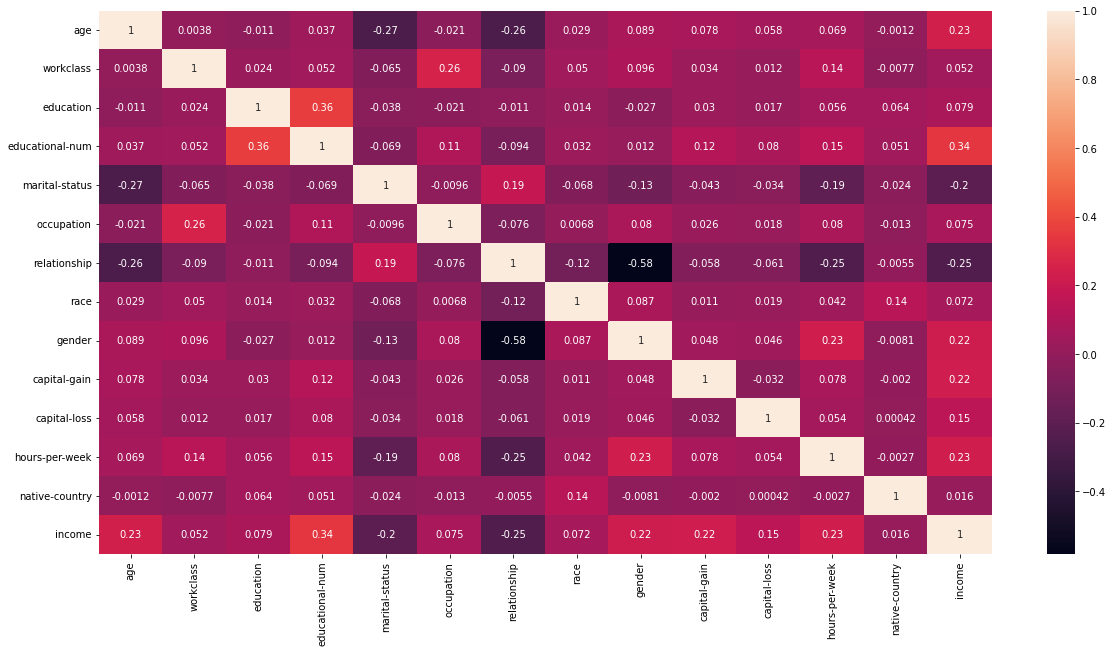

In [ ]:
data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot = True)
plt.show()
plt.close()

## Data Encoding

In [43]:
data

age  workclass  education  educational_num  marital_status  occupation  \
0       50          6          9               13               2           4   
1       38          4         11                9               0           6   
2       53          4          1                7               2           6   
3       28          4          9               13               2          10   
4       37          4         12               14               2           4   
...    ...        ...        ...              ...             ...         ...   
32555   27          4          7               12               2          13   
32556   40          4         11                9               2           7   
32557   58          4         11                9               6           1   
32558   22          4         11                9               4           1   
32559   52          5         11                9               2           4   

       relationship  race  gender  capital_gain  capital_loss  hours_per_week  \
0                 0     4       1             0             0              13   
1                 1     4       1             0             0              40   
2                 0     2       1             0             0              40   
3                 5     2       0             0             0              40   
4                 5     4       0             0             0              40   
...             ...   ...     ...           ...           ...             ...   
32555             5     4       0             0             0              38   
32556             0     4       1             0             0              40   
32557             4     4       0             0             0              40   
32558             3     4       1             0             0              20   
32559             5     4       0         15024             0              40   

       native_country  income  
0                  39       0  
1                  39       0  
2                  39       0  
3                   5       0  
4                  39       0  
...               ...     ...  
32555              39       0  
32556              39       1  
32557              39       0  
32558              39       0  
32559              39       1  

[32560 rows x 14 columns]

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32560 non-null  int64 
 1   workclass        32560 non-null  object
 2   education        32560 non-null  object
 3   educational_num  32560 non-null  int64 
 4   marital_status   32560 non-null  object
 5   occupation       32560 non-null  object
 6   relationship     32560 non-null  object
 7   race             32560 non-null  object
 8   gender           32560 non-null  object
 9   capital_gain     32560 non-null  int64 
 10  capital_loss     32560 non-null  int64 
 11  hours_per_week   32560 non-null  int64 
 12  native_country   32560 non-null  object
 13  income           32560 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [21]:
from sklearn.preprocessing import LabelEncoder
for column in data.columns:
    if data[column].dtype == type(object):
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              32560 non-null  int64
 1   workclass        32560 non-null  int64
 2   education        32560 non-null  int64
 3   educational_num  32560 non-null  int64
 4   marital_status   32560 non-null  int64
 5   occupation       32560 non-null  int64
 6   relationship     32560 non-null  int64
 7   race             32560 non-null  int64
 8   gender           32560 non-null  int64
 9   capital_gain     32560 non-null  int64
 10  capital_loss     32560 non-null  int64
 11  hours_per_week   32560 non-null  int64
 12  native_country   32560 non-null  int64
 13  income           32560 non-null  int64
dtypes: int64(14)
memory usage: 3.5 MB


In [44]:
data

age  workclass  education  educational_num  marital_status  occupation  \
0       50          6          9               13               2           4   
1       38          4         11                9               0           6   
2       53          4          1                7               2           6   
3       28          4          9               13               2          10   
4       37          4         12               14               2           4   
...    ...        ...        ...              ...             ...         ...   
32555   27          4          7               12               2          13   
32556   40          4         11                9               2           7   
32557   58          4         11                9               6           1   
32558   22          4         11                9               4           1   
32559   52          5         11                9               2           4   

       relationship  race  gender  capital_gain  capital_loss  hours_per_week  \
0                 0     4       1             0             0              13   
1                 1     4       1             0             0              40   
2                 0     2       1             0             0              40   
3                 5     2       0             0             0              40   
4                 5     4       0             0             0              40   
...             ...   ...     ...           ...           ...             ...   
32555             5     4       0             0             0              38   
32556             0     4       1             0             0              40   
32557             4     4       0             0             0              40   
32558             3     4       1             0             0              20   
32559             5     4       0         15024             0              40   

       native_country  income  
0                  39       0  
1                  39       0  
2                  39       0  
3                   5       0  
4                  39       0  
...               ...     ...  
32555              39       0  
32556              39       1  
32557              39       0  
32558              39       0  
32559              39       1  

[32560 rows x 14 columns]

In [39]:
features = data.drop(['income'],axis=1)
target = data['income']
x_train,x_test,y_train,y_test=train_test_split(features,target,random_state=42,test_size=0.25)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
x_test.head()

(24420, 13) (8140, 13) (24420,) (8140,)


age  workclass  education  educational_num  marital_status  occupation  \
14160   38          4         11                9               0           1   
27047   45          7         11                9               2           4   
28867   29          4          9               13               2           4   
5667    51          4         10               16               4          10   
7827    46          4         12               14               6          10   

       relationship  race  gender  capital_gain  capital_loss  hours_per_week  \
14160             4     4       0             0             0              20   
27047             5     4       0             0             0              40   
28867             0     2       1             0             0              55   
5667              1     4       1             0             0              40   
7827              1     4       0             0             0              44   

       native_country  
14160              39  
27047              39  
28867              39  
5667               39  
7827               39

## Data Modeling and Training

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
logistic_model = LogisticRegression(multi_class='multinomial', max_iter = 100)
logistic_model.fit(x_train, y_train)

train_predictions_logistic = logistic_model.predict(x_train)
test_predictions_logistic = logistic_model.predict(x_test)

In [25]:
SVC_Model=SVC()
SVC_Model.fit(x_train,y_train)
SVC_Model.score(x_test,y_test)
train_predictions_SVM=SVC_Model.predict(x_train)
test_predictions_SVM=SVC_Model.predict(x_test)

In [26]:
KNN_Model=KNeighborsClassifier(n_neighbors=13)
KNN_Model.fit(x_train,y_train)
train_predictions_KNN=KNN_Model.predict(x_train)
test_predictions_KNN=KNN_Model.predict(x_test)

In [27]:
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(x_train, y_train)

train_pred_DecisionTree = dt_model.predict(x_train)
test_pred_DecisionTree = dt_model.predict(x_test)

In [28]:
clf = RandomForestClassifier(max_depth=5, random_state=42)
clf.fit(x_train, y_train)
train_pred_RandomForest = clf.predict(x_train)
test_pred_RandomForest = clf.predict(x_test)

## Model Evaluation

In [29]:
print(f'Accuracy score for training LogisticRegression: {accuracy_score(y_train, train_predictions_logistic)*100:.2f}%')
print(f'Accuracy score for testing LogisticRegression: {accuracy_score(y_test, test_predictions_logistic)*100:.2f}%')

print('-'*100)

print(f'Accuracy score for training SVM: {accuracy_score(y_train, train_predictions_SVM)*100:.2f}%')
print(f'Accuracy score for testing SVM: {accuracy_score(y_test, test_predictions_SVM)*100:.2f}%')

print('-'*100)

print(f'Accuracy score for training KNN: {accuracy_score(y_train, train_predictions_KNN)*100:.2f}%')
print(f'Accuracy score for testing KNN: {accuracy_score(y_test, test_predictions_KNN)*100:.2f}%')

print('-'*100)

print(f'Accuracy score for training DecisionTree {accuracy_score(y_train, train_pred_DecisionTree)*100:.2f}%')
print(f'Accuracy score for testing DecisionTree {accuracy_score(y_test, test_pred_DecisionTree)*100:.2f}%')

print('-'*100)

print(f'Accuracy score for training RandomForest {accuracy_score(y_train, train_pred_RandomForest)*100:.2f}%')
print(f'Accuracy score for testing RandomForest {accuracy_score(y_test, test_pred_RandomForest)*100:.2f}%')

Accuracy score for training LogisticRegression: 80.27%
Accuracy score for testing LogisticRegression: 79.93%
----------------------------------------------------------------------------------------------------
Accuracy score for training SVM: 80.20%
Accuracy score for testing SVM: 80.33%
----------------------------------------------------------------------------------------------------
Accuracy score for training KNN: 86.72%
Accuracy score for testing KNN: 83.93%
----------------------------------------------------------------------------------------------------
Accuracy score for training DecisionTree 84.98%
Accuracy score for testing DecisionTree 84.64%
----------------------------------------------------------------------------------------------------
Accuracy score for training RandomForest 85.14%
Accuracy score for testing RandomForest 84.80%


Text(0.5, 1.0, 'RandomForestClassifier')

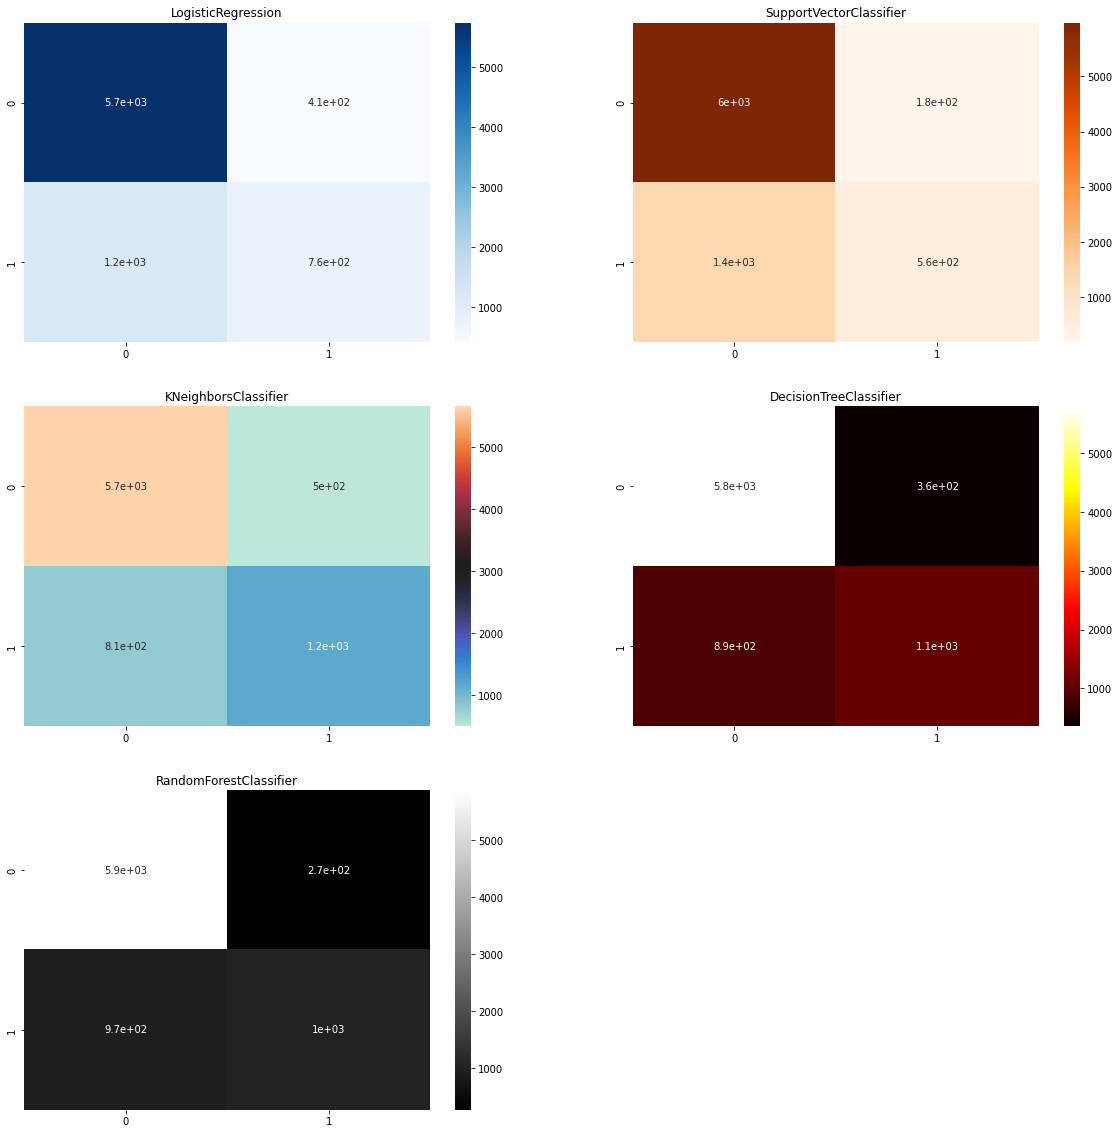

In [30]:
plt.figure(figsize=(20, 20))

plt.subplot(3, 2, 1)
ay=sns.heatmap(confusion_matrix(y_test,test_predictions_logistic),annot=True,cmap='Blues')
ay.set_title('LogisticRegression')
plt.subplot(3, 2, 2)
ay=sns.heatmap(confusion_matrix(y_test,test_predictions_SVM),annot=True,cmap='Oranges')
ay.set_title('SupportVectorClassifier')
plt.subplot(3, 2, 3)
ay=sns.heatmap(confusion_matrix(y_test,test_predictions_KNN),annot=True,cmap='icefire')
ay.set_title('KNeighborsClassifier')
plt.subplot(3, 2, 4)
ay=sns.heatmap(confusion_matrix(y_test,test_pred_DecisionTree),annot=True,cmap='hot')
ay.set_title('DecisionTreeClassifier')
plt.subplot(3, 2, 5)
ay=sns.heatmap(confusion_matrix(y_test,test_pred_RandomForest),annot=True,cmap='gray')
ay.set_title('RandomForestClassifier')

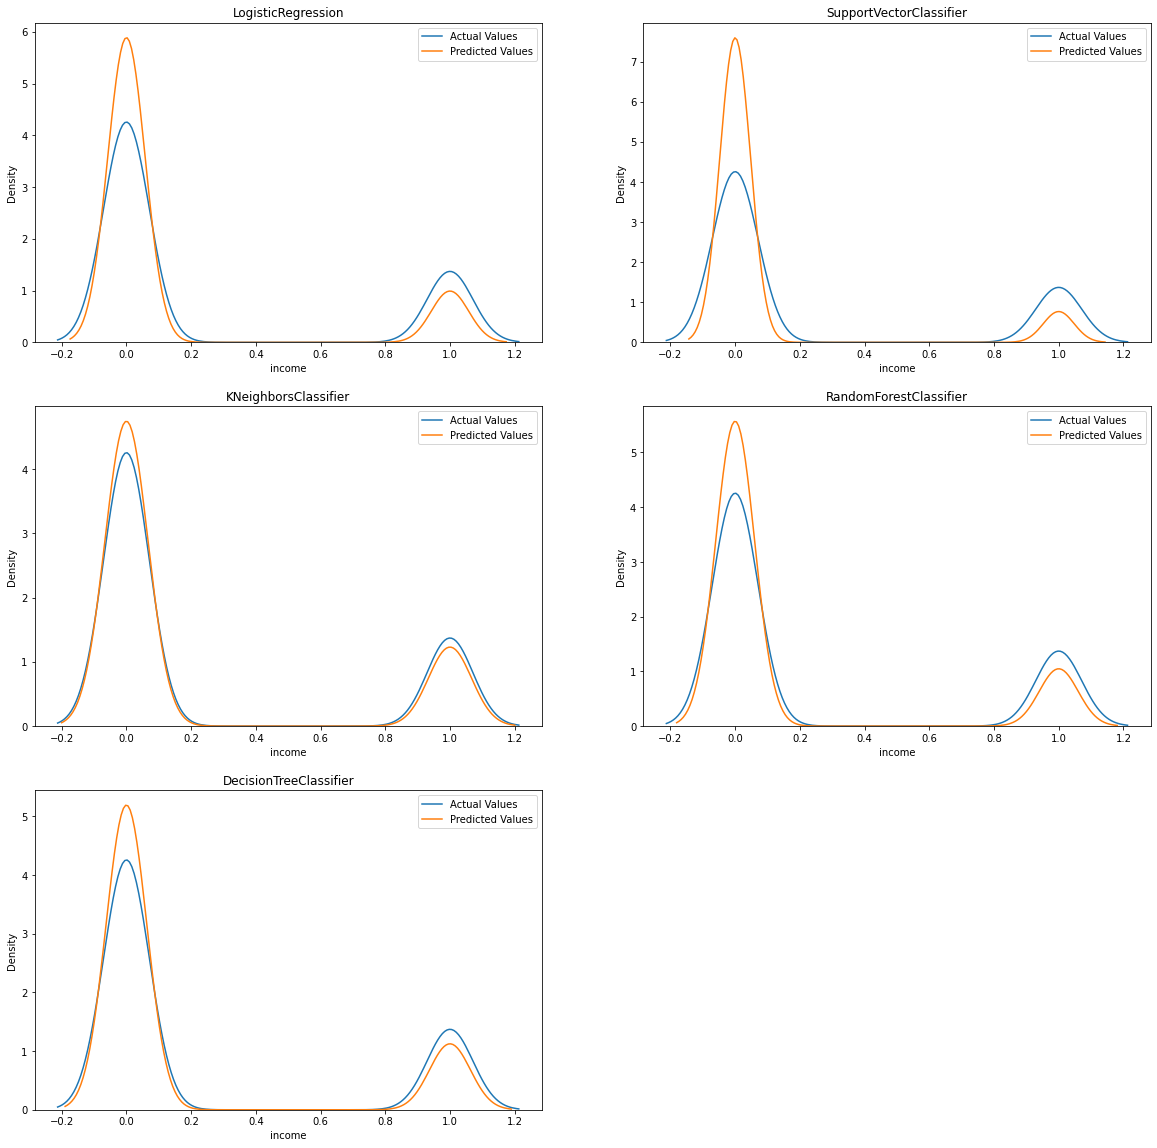

In [31]:
plt.figure(figsize=(20, 20))

plt.subplot(3, 2, 1)
ax=sns.distplot(y_test,hist=False,label='Actual Values')
ax=sns.distplot(test_predictions_logistic,hist=False,label='Predicted Values')
ax.set_title('LogisticRegression')
plt.legend()
plt.subplot(3, 2, 2)
ax=sns.distplot(y_test,hist=False,label='Actual Values')
ax=sns.distplot(test_predictions_SVM,hist=False,label='Predicted Values')
ax.set_title('SupportVectorClassifier')
plt.legend()
plt.subplot(3, 2, 3)
ax=sns.distplot(y_test,hist=False,label='Actual Values')
ax=sns.distplot(test_predictions_KNN,hist=False,label='Predicted Values')
ax.set_title('KNeighborsClassifier')
plt.legend()
plt.subplot(3, 2, 4)
ax=sns.distplot(y_test,hist=False,label='Actual Values')
ax=sns.distplot(test_pred_RandomForest,hist=False,label='Predicted Values')
ax.set_title('RandomForestClassifier')
plt.legend()
plt.subplot(3, 2, 5)
ax=sns.distplot(y_test,hist=False,label='Actual Values')
ax=sns.distplot(test_pred_DecisionTree,hist=False,label='Predicted Values')
ax.set_title('DecisionTreeClassifier')
plt.legend()

In [32]:
print(data.columns)

Index(['age', 'workclass', 'education', 'educational_num', 'marital_status',
       'occupation', 'relationship', 'race', 'gender', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')


In [36]:
def adult(age, workclass, education, educational_num, marital_status, occupation, relationship, race, gender, capital_gain,capital_loss, hours_per_week, native_country):
    x = np.array([age, workclass, education, educational_num, marital_status, occupation, relationship, race, gender, capital_gain, capital_loss, hours_per_week, native_country])
    prediction = clf.predict(x.reshape(1, -1))
    return prediction

In [37]:
outputs = gr.outputs.Textbox()

app = gr.Interface(fn=adult, inputs=['number','number','number','number','number','number','number','number','number','number','number','number','number'], outputs=outputs,description="This is a Adult Income Prediction Model")

In [38]:
app.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://26428.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f7d21668a10>,
 'http://127.0.0.1:7861/',
 'https://26428.gradio.app')